In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
%matplotlib inline

In [3]:
ticker = "TCS.BO"
data = yf.download(ticker, start = '2014-01-01', end = '2023-12-31')["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

Date
2014-01-01     858.149658
2014-01-02     861.576233
2014-01-03     885.364136
2014-01-06     892.376709
2014-01-07     879.865295
                 ...     
2023-12-22    3825.300049
2023-12-26    3794.600098
2023-12-27    3810.800049
2023-12-28    3801.050049
2023-12-29    3794.949951
Name: Adj Close, Length: 2444, dtype: float64

In [7]:
log_returns = np.log(1 + data.pct_change())

In [5]:
r = 0.07

In [8]:
stdev = log_returns.std() * 250 ** 0.5
stdev

0.23928655677539581

In [11]:
T = 1.0
t_intervals = 250
delta_t = T/t_intervals
iterations = 1000

In [12]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [13]:
for t in range (1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [14]:
S

array([[3794.94995117, 3794.94995117, 3794.94995117, ..., 3794.94995117,
        3794.94995117, 3794.94995117],
       [3854.80734553, 3815.69350185, 3817.3440136 , ..., 3794.87221384,
        3860.12711041, 3787.43205697],
       [3842.71044188, 3811.85448344, 3861.90896342, ..., 3855.07062612,
        3772.87696646, 3787.29940406],
       ...,
       [4064.43510588, 3632.82742516, 4040.45671319, ..., 5434.25396475,
        3394.11799611, 4151.5438247 ],
       [4232.83183088, 3570.99884977, 4020.54144663, ..., 5331.31599617,
        3447.48471901, 4155.47789425],
       [4335.30374003, 3566.63560617, 4041.89989773, ..., 5273.78971412,
        3382.10472331, 4139.03202139]])

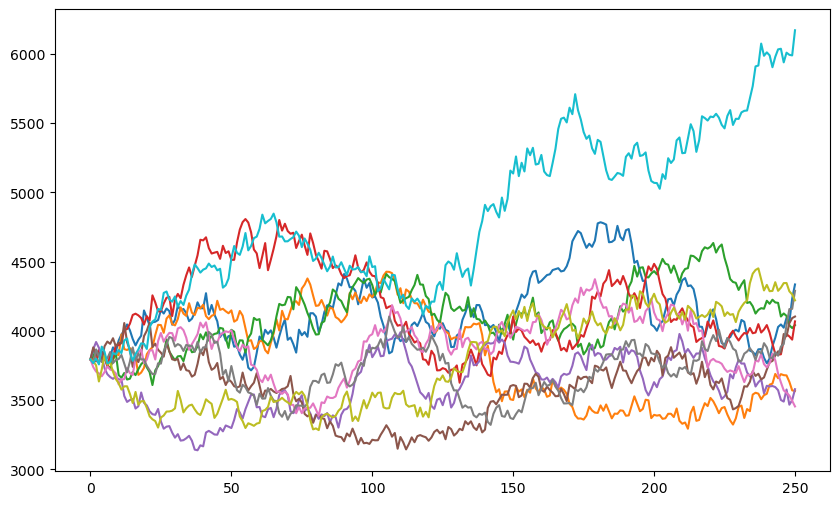

In [17]:
plt.figure(figsize = (10,6))
plt.plot(S[:, : 10]);
# First 10 iterations

In [18]:
p = np.maximum(S[-1] - 3500,0)

In [19]:
p

array([8.35303740e+02, 6.66356062e+01, 5.41899898e+02, 5.68649803e+02,
       7.94461931e+01, 6.03834298e+02, 0.00000000e+00, 7.89881295e+02,
       7.20640740e+02, 2.66980770e+03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.53084735e+02, 0.00000000e+00, 2.14170288e+03,
       2.33409322e+03, 4.22382400e+02, 4.13196683e+01, 1.81904679e+03,
       2.36097619e+03, 2.80664270e+03, 2.68488929e+03, 2.63187299e+03,
       9.56632004e+02, 0.00000000e+00, 1.66102009e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.68664077e+01, 0.00000000e+00,
       1.20456032e+03, 6.11356904e+02, 6.93816904e+02, 6.05645680e+02,
       7.22402406e+01, 0.00000000e+00, 2.23262042e+02, 2.47177281e+03,
       8.35730669e+02, 2.50041568e+03, 3.01002769e+03, 0.00000000e+00,
       9.79127569e+02, 1.15740015e+03, 1.11332253e+03, 1.79353989e+03,
       1.28498659e+02, 0.00000000e+00, 3.89877974e+02, 2.58744936e+02,
       3.20345658e+02, 0.00000000e+00, 8.68133213e+02, 2.67489164e+01,
      

In [20]:
C = np.exp(-r * T) * np.sum(p)/iterations
C

641.8524975032324